In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df=pd.read_csv(r'/content/twitter_sexism_parsed_dataset.csv')

In [43]:
df.head()

index                     id  \
0  5.35198627292254E+017  5.35198627292254E+017   
1  5.75984924030714E+017  5.75984924030714E+017   
2   5.7233536016588E+017   5.7233536016588E+017   
3  5.72337925708374E+017  5.72337925708374E+017   
4  4.43033024528011E+017  4.43033024528011E+017   

                                                Text Annotation  oh_label  
0  RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...     sexism       1.0  
1   There's some very hate able teams this year #MKR       none       0.0  
2  RT @The_Eccles: "Everyone underestimated us" \...       none       0.0  
3  RT @NOTLukeDarcy: did @Channel7 or #MKR actual...       none       0.0  
4  No, you don't. @Shut_Up_Jeff: I thought of a r...     sexism       1.0

In [44]:
df.isnull().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [45]:
df=df.dropna()

In [46]:
df.describe()

oh_label
count  14878.000000
mean       0.226979
std        0.418893
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [47]:
df.shape

(14878, 5)

In [48]:
!pip install keras

In [49]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

from collections import Counter
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud

from textblob import TextBlob

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [51]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

In [53]:
pip install contractions

In [54]:
import contractions

In [55]:
only_english = set(nltk.corpus.words.words())
def clean_text(text):

    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('#', ' ', sample) #remove hashtags
    sample = ' '.join([x for x in sample.split() if not x.startswith('@')]) # remove mentions with @
    sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample = re.sub('[%s]' % re.escape(string.punctuation), ' ', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes

    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english

    sample = sample.strip()
    sample = " ".join([x.strip() for x in sample.split()])

    return sample

In [56]:
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text(str(x)))
df


index                     id  \
0      5.35198627292254E+017  5.35198627292254E+017   
1      5.75984924030714E+017  5.75984924030714E+017   
2       5.7233536016588E+017   5.7233536016588E+017   
3      5.72337925708374E+017  5.72337925708374E+017   
4      4.43033024528011E+017  4.43033024528011E+017   
...                      ...                    ...   
14876  5.76422824501379E+017  5.76422824501379E+017   
14877  4.64045547473498E+017  4.64045547473498E+017   
14878  5.54705698508919E+017  5.54705698508919E+017   
14879   5.7560079584598E+017   5.7560079584598E+017   
14880  5.67826532711862E+017  5.67826532711862E+017   

                                                    Text Annotation  oh_label  \
0      RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...     sexism       1.0   
1       There's some very hate able teams this year #MKR       none       0.0   
2      RT @The_Eccles: "Everyone underestimated us" \...       none       0.0   
3      RT @NOTLukeDarcy: did @Channel7 or #MKR actual...       none       0.0   
4      No, you don't. @Shut_Up_Jeff: I thought of a r...     sexism       1.0   
...                                                  ...        ...       ...   
14876  @RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...       none       0.0   
14877  It is unconscionable that our regulatory bodie...       none       0.0   
14878  @Dartanveerahmad @Janx53 @geehall1 We want ISI...       none       0.0   
14879  #mkr  Unbelievable how low Kat &amp; Andre wil...       none       0.0   
14880  RT @JamesMakienko: @omeisy @yemenrightsmon Peo...       none       0.0   

                                            cleaned_text  
0      rt i am not sexist but fuck if you are a woman...  
1       there is some very hate able teams this year mkr  
2      rt everyone underestimated us we still do as w...  
3      rt did or mkr actually check if any of these p...  
4      no you do not i thought of a really funny joke...  
...                                                  ...  
14876                            why do you hate freedom  
14877  it is unconscionable that our regulatory bodie...  
14878  we want isis to remain it is the perfect killi...  
14879  mkr unbelievable how low kat amp andre will go...  
14880  rt people in yemen see through russia supporti...  

[14878 rows x 6 columns]

In [57]:
cleaned_text=df['cleaned_text']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(cleaned_text).toarray()
y=df['oh_label']

In [59]:
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0        1.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
14876    0.0
14877    0.0
14878    0.0
14879    0.0
14880    0.0
Name: oh_label, Length: 14878, dtype: float64


In [60]:
len(X[0])

1500

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GN_model=classifier.fit(X_train, y_train)

In [63]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 724 1582]
 [  41  629]]


0.45463709677419356

In [64]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
SC_model=classifier.fit(X_train, y_train)

In [65]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2271   35]
 [ 369  301]]


0.864247311827957

In [67]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model=KNN.fit(X_train, y_train)

In [68]:
y_pred = KNN.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [69]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2244   62]
 [ 473  197]]


0.8202284946236559

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model=classifier.fit(X_train, y_train)

In [71]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[2066  240]
 [ 282  388]]


0.8245967741935484

In [72]:
from sklearn import tree
import sys
sys.setrecursionlimit(10000)
plt.figure(figsize=(150,145))
tree.plot_tree(classifier, filled=True)

[Text(0.9547229343812048, 0.9985994397759104, 'x[1150] <= 0.5\nentropy = 0.774\nsamples = 11902\nvalue = [9195, 2707]'),
 Text(0.9278562902891878, 0.9957983193277311, 'x[896] <= 0.5\nentropy = 0.672\nsamples = 11070\nvalue = [9120, 1950]'),
 Text(0.906903855751508, 0.9929971988795518, 'x[446] <= 0.5\nentropy = 0.644\nsamples = 10896\nvalue = [9110, 1786]'),
 Text(0.8732416496277549, 0.9901960784313726, 'x[688] <= 0.5\nentropy = 0.632\nsamples = 10818\nvalue = [9097, 1721]'),
 Text(0.8276220126853822, 0.9873949579831933, 'x[1091] <= 0.5\nentropy = 0.596\nsamples = 9974\nvalue = [8533, 1441]'),
 Text(0.768820187323512, 0.9845938375350141, 'x[527] <= 0.5\nentropy = 0.533\nsamples = 8092\nvalue = [7112, 980]'),
 Text(0.7594330817001091, 0.9817927170868347, 'x[141] <= 0.5\nentropy = 0.511\nsamples = 7926\nvalue = [7024, 902]'),
 Text(0.7525890405148388, 0.9789915966386554, 'x[448] <= 0.5\nentropy = 0.503\nsamples = 7894\nvalue = [7018, 876]'),
 Text(0.7449744992665343, 0.9761904761904762, '

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model=classifier.fit(X_train, y_train)

In [74]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2219   87]
 [ 324  346]]


0.8618951612903226

In [75]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
feature_names=None
plt.figure(figsize=(150,140))
plot_tree(classifier.estimators_[0],
          feature_names=feature_names,
          class_names='class',
          filled=True, impurity=True,
          rounded=True)
plt.show()

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
log_model=classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2206  100]
 [ 280  390]]


0.8723118279569892

<ipython-input-79-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      2306
         1.0       0.76      0.29      0.42       670

    accuracy                           0.82      2976
   macro avg       0.79      0.63      0.66      2976
weighted avg       0.81      0.82      0.79      2976



<ipython-input-79-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      2306
         1.0       0.80      0.52      0.63       670

    accuracy                           0.86      2976
   macro avg       0.84      0.74      0.77      2976
weighted avg       0.86      0.86      0.85      2976



<ipython-input-79-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.95      0.31      0.47      2306
         1.0       0.28      0.94      0.44       670

    accuracy                           0.45      2976
   macro avg       0.62      0.63      0.45      2976
weighted avg       0.80      0.45      0.46      2976



<ipython-input-79-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2306
         1.0       0.62      0.58      0.60       670

    accuracy                           0.82      2976
   macro avg       0.75      0.74      0.74      2976
weighted avg       0.82      0.82      0.82      2976



<ipython-input-79-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      2306
         1.0       0.90      0.45      0.60       670

    accuracy                           0.86      2976
   macro avg       0.88      0.72      0.76      2976
weighted avg       0.87      0.86      0.85      2976



<ipython-input-79-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-79-ff13a287dbe0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette="colorblind")


              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      2306
         1.0       0.80      0.58      0.67       670

    accuracy                           0.87      2976
   macro avg       0.84      0.77      0.80      2976
weighted avg       0.87      0.87      0.86      2976

                   Models   Accuracy
0    KNeighborsClassifier  79.838090
0  RandomForestClassifier  84.409193
0              GaussianNB  54.636861
0  DecisionTreeClassifier  81.352564
0                     SVC  84.443202
0      LogisticRegression  85.619958


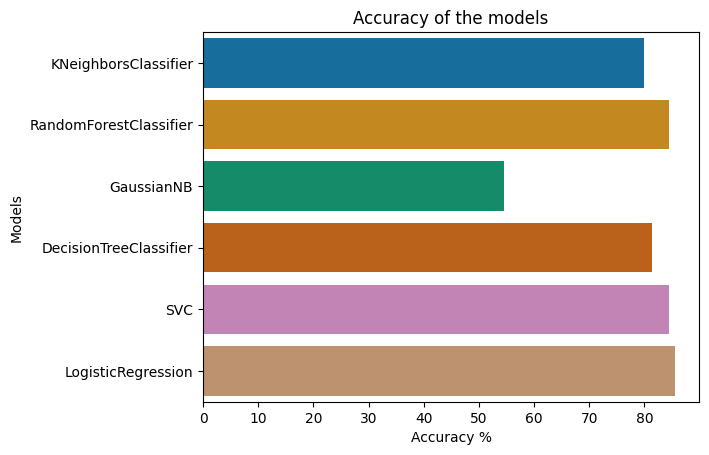

In [79]:
import seaborn as sea
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
models = [KNN_model,rf_model,GN_model,DT_model,SC_model,log_model]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,y_test,cv=10,scoring="accuracy").mean()
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    print(classification_report(y_test, y_pred))

sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette="colorblind")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
print(results)